In [5]:
# Import the necessary libraries
import numpy as np
import scipy.stats as sts
import requests
##########################################
#url = ('https://raw.githubusercontent.com/rickecon/' +
      # 'StructEst_W19/ProblemSets/PS2/clms.txt')

#data_file = requests.get(url, allow_redirects=True)
#open('clms.txt', 'wb').write(data_file.content)


#print("datasets downloaded successfully")
#print(data)                                  --------> THIS DOESN'T WORK - WHY? 
##########################################

#Load the data as a NumPy array
data = np.loadtxt('C:\Git_NEWWWWWWWWW\StructEst_W19\ProblemSets\PS2\clms.txt')
data


array([361.65, 123.04, 541.77, ...,  97.43, 186.88, 119.19])

720.2779753272437 172.21 0.01 227967.25 3972.663756393663


<IPython.core.display.Javascript object>


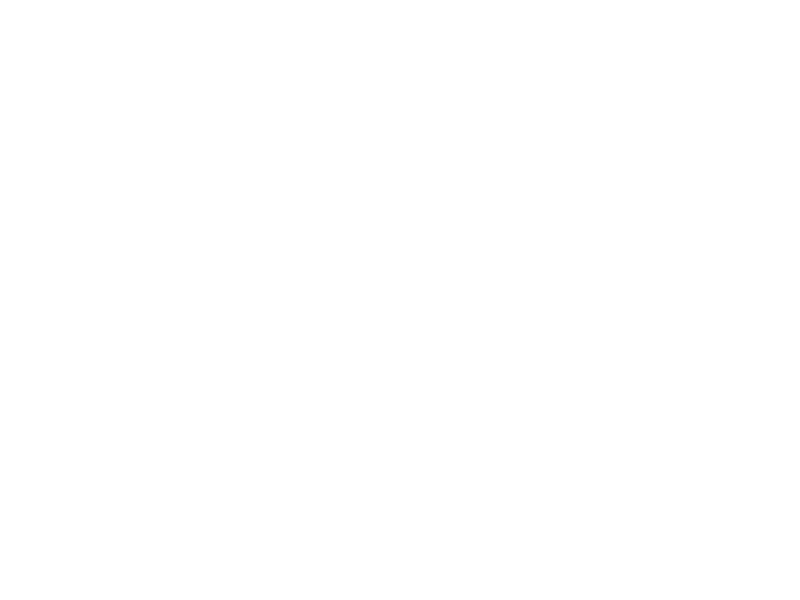

Text(0, 0.5, 'Percent of sample')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import requests

from scipy.stats import gamma

#PART A

print(np.mean(data), np.median(data), np.min(data), np.max(data), np.std(data))

#first histogram

%matplotlib notebook
count, bins, ignored = plt.hist(data, 1000, density=True,
                                edgecolor='k')
plt.title('Monthly health expenditures', fontsize=20)
plt.xlabel(r'Expenditures')
plt.ylabel(r'Percent of sample')
      


In [20]:
#calculating weights

#summing how many observations are <=800   -> answer:9020
#((data <=800 ) & (data>=0)).sum()

#calculating the vector of weights
#weights = (1 / 9020) * np.ones(9020)


9020

<IPython.core.display.Javascript object>


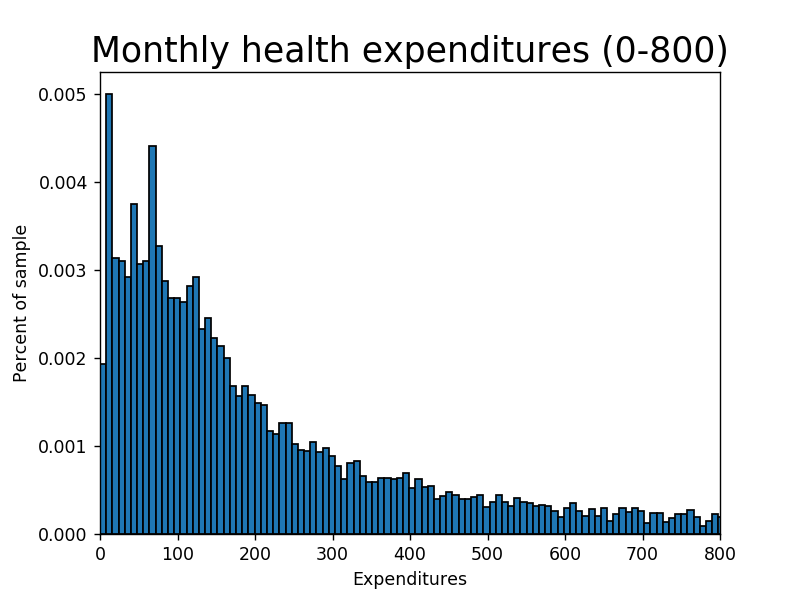

(0, 800)

In [7]:
#second histogram
      
%matplotlib notebook
count, bins, ignored = plt.hist(data, 28571 , density=True,  #when I put 28571 bins in total, there are 100 bins in the 0-800 range
                                edgecolor='k')
plt.title('Monthly health expenditures (0-800)', fontsize=20)
plt.xlabel(r'Expenditures')
plt.ylabel(r'Percent of sample')
plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted"

0.032872796694206986 21911.064702753894
alpha_MLE= 0.4725130059019564 beta_MLE= 1524.3558730482632
Log-likelihood GA:  -77723.47342496573


C:\Users\avasilj\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>


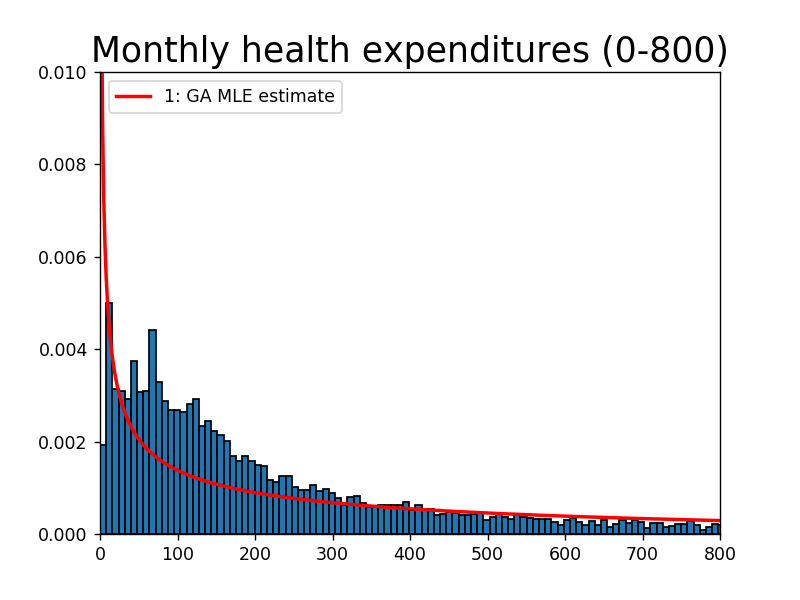

C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


In [8]:
import scipy.special as spc

#defining pdf of GA
def GApdf(alpha, beta, xvals):
    pdf_vals    = ( (1/beta**alpha)*(xvals**(alpha-1)) 
                   * np.exp(-(xvals/beta))/spc.gamma(alpha))

    return pdf_vals

#defining log likelihood function of GA                  
def log_lik_pdf(alpha, beta, xvals):
    pdf_vals = GApdf(alpha, beta, xvals)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

#to maximise log likelihood need t set up a maximisation (min actually) problem
def crit(params, *args):              
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_pdf(alpha, beta, xvals )
    neg_log_lik_val = -log_lik_val   
    return neg_log_lik_val                  
                   
#MLE
import scipy.optimize as opt

var=np.var(data)
e=np.mean(data)
beta_init = float(var/e)
alpha_init = float(e**2/var)
params_init = np.array([alpha_init, beta_init])
mle_args = data

print (alpha_init,  beta_init)

#STH HAPPENS HERE AND IT STOPS WORKING (TypeError: unsupported operand type(s) for /: 'float' and 'rv_frozen')

results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='Nelder-Mead',
                            bounds=((1e-10, None), (1e-10, None)))
alpha_MLE, beta_MLE = results_cstr.x
print('alpha_MLE=', alpha_MLE, 'beta_MLE=', beta_MLE)

print('Log-likelihood GA: ', log_lik_pdf(alpha_MLE, beta_MLE, data))

#results_uncstr = opt.minimize(crit , params_init, args=(mle_args))
#alpha_MLE, beta_MLE = results_uncstr.x
#print('alpha_MLE=', alpha_MLE, 'beta_MLE=', beta_MLE)
                   

#plot histogram and estimated gamma pdf over it
#histogram from b
%matplotlib notebook
count, bins, ignored = plt.hist(data, 28571 , density=True,  #when I put 28571 bins in total, there are 100 bins in the 0-800 range
                                edgecolor='k')
plt.title('Monthly health expenditures (0-800)', fontsize=20)
plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted"

#Plot smooth line with GA distribution

dist_pts = np.linspace(0, 800, 500)
plt.plot(dist_pts, GApdf(alpha_MLE, beta_MLE, dist_pts),
         linewidth=2, color='r', label='1: GA MLE estimate')
plt.ylim([0, 0.008])
plt.xlim([0, 800])
plt.legend(loc='upper left')

#xvals = (data)
#plt.plot(GApdf(alpha_MLE, beta_MLE, xvals),
         #linewidth=2, color='r', label='1: GA MLE estimate')
#plt.ylim([0, 0.008])
#plt.xlim([0, 800])
#plt.legend(loc='upper left')



GGalpha_MLE= 0.4725 GGbeta_MLE= 0.4725 GGm_MLE= 1.0
Log-likelihood GG:  -inf


C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\avasilj\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


<IPython.core.display.Javascript object>


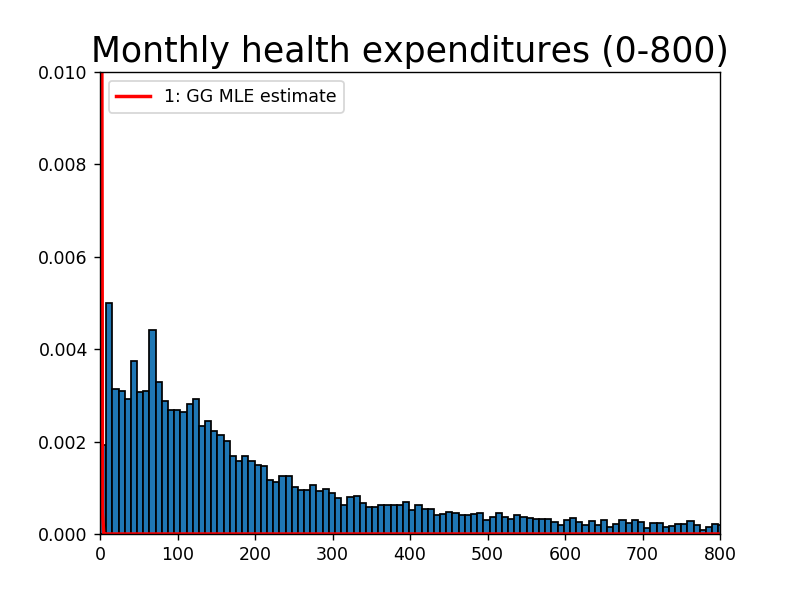

C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


In [9]:
#PART C

#defining pdf of GG
def GGpdf(alpha, beta, m, xvals):
            
    GGpdf_vals    = ( (m/beta**alpha)*(xvals**(alpha -1)) 
                   * np.exp(-(xvals/beta)**m)/spc.gamma(alpha/m))
    
    return GGpdf_vals

#defining log likelihood function of GG                   
def log_lik_GGpdf(alpha, beta, m, xvals):
    GGpdf_vals = GGpdf(alpha, beta, m, xvals)
    GGln_pdf_vals = np.log(GGpdf_vals)
    GGlog_lik_val = GGln_pdf_vals.sum()
    
    return GGlog_lik_val

#to maximise log likelihood need t set up a maximisation (min actually) problem
def GGcrit(params, *args):              
    alpha, beta, m = params
    xvals = args
    GGlog_lik_val = log_lik_GGpdf(alpha, beta, m, xvals)
    GGneg_log_lik_val = -GGlog_lik_val
    
    return GGneg_log_lik_val
                                      

#MLE
import scipy.optimize as opt

alpha_init = 0.4725
beta_init = 1524.3
m_init = 1
params_init = np.array([alpha_init, alpha_init, m_init])
mle_args = (data)

results_cstr = opt.minimize(GGcrit, params_init, args=(mle_args), method='L-BFGS-B',
                            bounds=((1e-5, 10), (1e-5, 10), (1e-5, 10)))
GGalpha_MLE, GGbeta_MLE, GGm_MLE = results_cstr.x
print('GGalpha_MLE=', GGalpha_MLE, 'GGbeta_MLE=', GGbeta_MLE, 'GGm_MLE=', GGm_MLE)

#

print('Log-likelihood GG: ', log_lik_GGpdf(GGalpha_MLE, GGbeta_MLE, GGm_MLE, data))

#print('Log-likelihood GG: ', log_lik_GGpdf(1.7, 0.1, 0.25, data))
#ITS DIVIDING BY ZERO SOMEWHERE.... *CRY*

#
    
#histogram from b
%matplotlib notebook
count, bins, ignored = plt.hist(data, 28571 , density=True,  #when I put 28571 bins in total, there are 100 bins in the 0-800 range
                                edgecolor='k')
plt.title('Monthly health expenditures (0-800)', fontsize=20)
plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted"

#Plot smooth line with GA distribution

dist_pts = np.linspace(0, 800, 500)
plt.plot(dist_pts, GGpdf(GGalpha_MLE, GGbeta_MLE, GGm_MLE, dist_pts),
         linewidth=2, color='r', label='1: GG MLE estimate')
plt.ylim([0, 0.008])
plt.xlim([0, 800])
plt.legend(loc='upper left')




C:\Users\avasilj\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\avasilj\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\avasilj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


a_MLE= 1.7396 b_MLE= 0.1 p_MLE= 0.24872 q_MLE= 10000.0
Log-likelihood GB2:  -inf


<IPython.core.display.Javascript object>


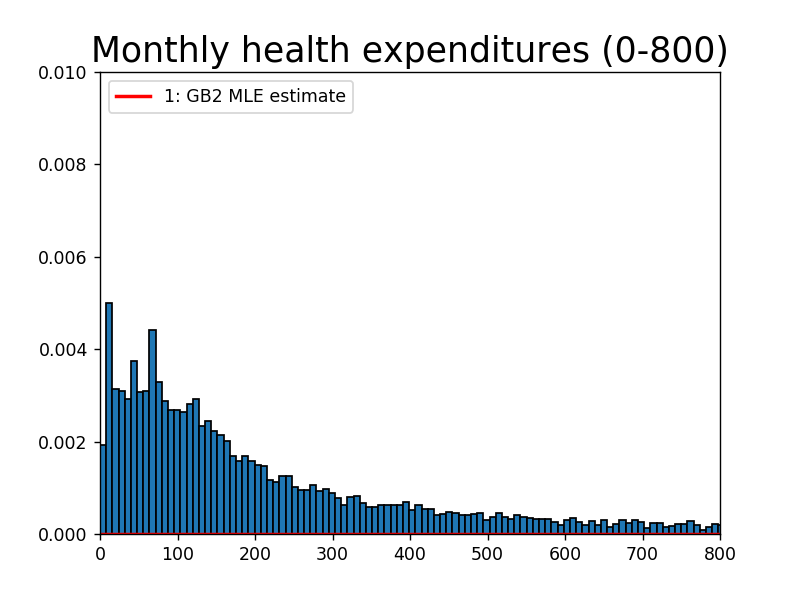

C:\Users\avasilj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


In [32]:
#PART D

import scipy.special as spc

#defining pdf of Gb2
def GB2pdf(a,b,p,q, xvals):
    a = abs(a)
    GB2pdf_vals    = (a*xvals**(a*p-1)/(b**(a*p)*spc.beta(p,q)*(1+(xvals/b)**a)**(p+q)))
    return GB2pdf_vals

#defining log likelihood function of GA                  
def GB2log_lik_pdf(a,b,p,q, xvals):
    GB2pdf_vals = GB2pdf(a,b,p,q, xvals)
    GB2ln_pdf_vals = np.log(GB2pdf_vals)
    GB2log_lik_val = GB2ln_pdf_vals.sum()
    
    return GB2log_lik_val

#to maximise log likelihood need t set up a maximisation (min actually) problem
def crit(params, *args):              
    a,b,p,q = params
    xvals = args
    GB2log_lik_val = GB2log_lik_pdf(a,b,p,q, xvals)
    GB2neg_log_lik_val = -GB2log_lik_val   
    return GB2neg_log_lik_val                  
                   
#MLE
import scipy.optimize as opt

#took Tim's initial values from (c) given that my (c) is weird
a_init = 1.7396
b_init = 0.1
p_init = 0.24872
q_init = 10000
params_init = np.array([a_init, b_init, p_init,q_init])
mle_args = data

#
#
#AGAIN IS DIVIDING BY ZEROOOOOOOO
#
#
#

results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='Nelder-Mead',
                            bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
a_MLE, b_MLE,p_MLE, q_MLE = results_cstr.x
print('a_MLE=', a_MLE, 'b_MLE=', b_MLE,'p_MLE=', p_MLE, 'q_MLE=', q_MLE)

print('Log-likelihood GB2: ', GB2log_lik_pdf(a_MLE, b_MLE, p_MLE, q_MLE, data))
              

#plot histogram and estimated gamma pdf over it
#histogram from b
%matplotlib notebook
count, bins, ignored = plt.hist(data, 28571 , density=True,  #when I put 28571 bins in total, there are 100 bins in the 0-800 range
                                edgecolor='k')
plt.title('Monthly health expenditures (0-800)', fontsize=20)
plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted"

#Plot smooth line with GA distribution

dist_pts = np.linspace(0, 800, 500)
plt.plot(dist_pts, GB2pdf(a_MLE, b_MLE, p_MLE, q_MLE, dist_pts),
         linewidth=2, color='r', label='1: GB2 MLE estimate')
plt.ylim([0, 0.008])
plt.xlim([0, 800])
plt.legend(loc='upper left')





In [ ]:
#PART E

#LIKELIHOOD RATIO TEST (GA and GG against GB2)
##have not run it yet bcs my part c and d don't work so cant pull values from there

log_lik_GB2 = GB2log_lik_pdf(a_MLE,b_MLE,p_MLE, q_MLE, xvals)

log_lik_GA = log_lik_pdf(alpha_MLE, beta_MLE, xvals)
log_lik_GG = log_lik_GGpdf(alpha_MLE, beta_MLE, m_MLE, xvals)

LR_val_GA = 2 * (log_lik_GA - log_lik_GB2)
pval_h0_GA = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value for GA = ', pval_h0_GA)

LR_val_GG = 2 * (log_lik_GG - log_lik_GB2)
pval_h0_GG = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value for GG = ', pval_h0_GG)


In [26]:
#PART F

import scipy.integrate as integrate
from scipy.integrate import quad

def integrandGB2(x, a, b,p,q):
    return (a*x**(a*p-1)/(b**(a*p)*spc.beta(p,q)*(1+(x/b)**a)**(p+q)))

a = 1.2714
b = 143.23
p = 1.0299
q = 0.84852
area = quad(integrandGB2, 0, 1000, args=(a,b,p,q))
area
probability = 1-0.8823424706542954
print('Probability of having >1000, according to GB2:', probability)

def integrandGA(x, alpha, beta):
    return ( (1/beta**alpha)*(x**(alpha-1)) 
                   * np.exp(-(x/beta))/spc.gamma(alpha))
alpha = 0.47251
beta = 1524.4
areaGA = quad(integrandGA, 0, 1000, args=(alpha, beta))
areaGA
probabilityGA = 1-0.7632176931387752
print('Probability of having >1000, according to GA:', probabilityGA)


#area = integrate.quad(GB2pdf(1.2714,143.23,1.0299,0.84852, ), 0, 1000)




Probability of having >1000, according to GB2: 0.11765752934570461
Probability of having >1000, according to GA: 0.2367823068612248


In [49]:
#QUESTION 2

import numpy as np
import scipy as sci
import scipy.optimize as opt
import scipy.stats as stats
import pandas as pd
import scipy.integrate as integrate
import matplotlib.pyplot as plt

#importing data

import pandas as pd
df = pd.read_csv('C:\Git_NEWWWWWWWWW\StructEst_W19\ProblemSets\PS2\MacroSeries.txt', names=['C', 'K', 'W', 'R'])
df

#w = np.array('W')
#k = np.array('K')

#PART A

#backing out z(t)'s via eqn 3
def calc_z(W, K, alpha):
    z = np.log(W/(((K)**alpha)*(1-alpha)))
    return z

#defing the criterion function (z normally distributed with mean log(w/(((k)**alpha)*(1-alpha))) and variance sigma )
def crit_eqn_five(params, df):
    alpha, rho, mu, sigma = params
    z = calc_z(df['W'], df['K'], alpha)
    z_lag = z.shift(1)
    z_lag[0] = mu
    
    log_lik_val = - np.log(sigma) - 0.5*np.log(2 * np.pi) - (z - (rho*z_lag+(1-rho)*mu))**2 / (2 * sigma**2)
        
    return -np.sum(log_lik_val)

#maximising loglikelihood (minimising negative log_lik)

#choosing some mid-range values for the initials
alpha_init = 0.5
rho_init = 0.1
mu_init = 1
sig_init = 1
params_init = np.array([alpha_init, rho_init, mu_init, sig_init])


results_cstr = opt.minimize(crit_eqn_five, params_init, args=df, method='L-BFGS-B',
                            bounds=((1e-10, 1), (-1, 1), (1e-10, None), (1e-10, None)))

a_alpha_MLE, a_rho_MLE, a_mu_MLE, a_sig_MLE = results_cstr.x

print('alpha_MLE=', a_alpha_MLE, ' rho_MLE=', a_rho_MLE, ' mu_MLE=', a_mu_MLE, ' sigma_MLE=', a_sig_MLE)

#maximised log likelihood
a_max_log_lik = -crit_eqn_five([a_alpha_MLE, a_rho_MLE, a_mu_MLE, a_sig_MLE], df)
print('Log-likelihood for z', a_max_log_lik)

#variance-covariance matrix (inverse of hessian)
var_covar = results_cstr.hess_inv.todense()
print('Variance-Covariance matrix\n ', var_covar)


alpha_MLE= 0.7020889835637729  rho_MLE= 0.47981813384880767  mu_MLE= 6.254113447981336  sigma_MLE= 0.09204367428641419
Log-likelihood for z 96.65373751086061
Variance-Covariance matrix
  [[ 2.99757569e+01 -6.15530910e+01 -3.63912704e+02  1.08913211e+00]
 [-6.15530910e+01  1.26891128e+02  7.47291439e+02 -2.23502815e+00]
 [-3.63912704e+02  7.47291439e+02  4.41798692e+03 -1.32221765e+01]
 [ 1.08913211e+00 -2.23502815e+00 -1.32221765e+01  3.96534482e-02]]


In [50]:
#PART B

#backing out z(t)'s via eqn 4
def calc_z_b(R, K, alpha):
    z = np.log(R/(((K)**(alpha-1))*(alpha)))
    return z

#defing the criterion function (z normally distributed with mean log(R/(((K)**(alpha-1))*(alpha))) and variance sigma )
def crit_eqn_four(params, df):
    alpha, rho, mu, sigma = params
    z = calc_z_b(df['R'], df['K'], alpha)
    z_lag = z.shift(1)
    z_lag[0] = mu
    
    log_lik_val = - np.log(sigma) - 0.5*np.log(2 * np.pi) - (z - (rho*z_lag+(1-rho)*mu))**2 / (2 * sigma**2)
        
    return -np.sum(log_lik_val)

#maximising loglikelihood (minimising negative log_lik)

#choosing some mid-range values for the initials (as before)
alpha_init = 0.5
rho_init = 0.1
mu_init = 1
sig_init = 1
params_init = np.array([alpha_init, rho_init, mu_init, sig_init])


results_cstr = opt.minimize(crit_eqn_four, params_init, args=df, method='L-BFGS-B',
                            bounds=((1e-10, 1), (-1, 1), (1e-10, None), (1e-10, None)))

b_alpha_MLE, b_rho_MLE, b_mu_MLE, b_sig_MLE = results_cstr.x

print('alpha_MLE=', b_alpha_MLE, ' rho_MLE=', b_rho_MLE, ' mu_MLE=', b_mu_MLE, ' sigma_MLE=', b_sig_MLE)

#maximised log likelihood
b_max_log_lik = -crit_eqn_four([b_alpha_MLE, b_rho_MLE, b_mu_MLE, b_sig_MLE], df)
print('Log-likelihood for z', b_max_log_lik)

#variance-covariance matrix (inverse of hessian)
var_covar_b = results_cstr.hess_inv.todense()
print('Variance-Covariance matrix\n ', var_covar_b)


alpha_MLE= 0.7019065018618716  rho_MLE= 0.4800131097365254  mu_MLE= 5.077215484032572  sigma_MLE= 0.09204516070830146
Log-likelihood for z 96.65373704393252
Variance-Covariance matrix
  [[ 1.16635462e+03 -1.55016951e+03 -2.00374825e+04  2.36461710e+01]
 [-1.55016951e+03  2.06058002e+03  2.66313096e+04 -3.14694979e+01]
 [-2.00374825e+04  2.66313096e+04  3.44235543e+05 -4.06238439e+02]
 [ 2.36461710e+01 -3.14694979e+01 -4.06238439e+02  4.85629323e-01]]
